Olivetti 데이터 
- 얼굴 인식용 데이터

20번 사람의 픽셀 데이터를 주성분 분석해본다

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [4]:
k = 20
faces = faces_all.images[faces_all.target==k]
faces

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

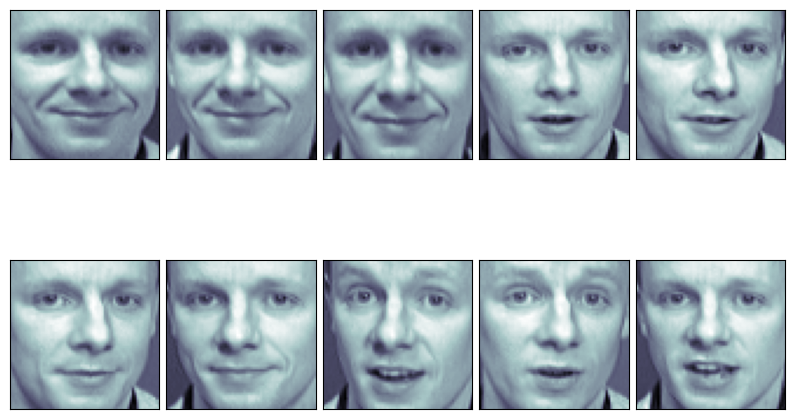

In [12]:
#원본 10장 사진 출력
import matplotlib.pyplot as plt 

N=2
M=5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0,hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.show()


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X = faces_all.data[faces_all.target == k]
X.shape

(10, 4096)

In [15]:
import numpy as np

np.sqrt(4096)
#이 데이터는 64X64 픽셀이었다

64.0

In [16]:
W = pca.fit_transform(X)
W.shape

(10, 2)

In [17]:
W

array([[-2.2136743 ,  4.213511  ],
       [ 2.2680898 ,  3.7376184 ],
       [ 0.65999395,  3.1209497 ],
       [-1.7500468 , -1.40966   ],
       [-3.396381  , -1.5552846 ],
       [-3.3355854 , -1.7309334 ],
       [ 3.385145  , -2.1805704 ],
       [ 3.9338186 , -1.5998865 ],
       [-3.209438  , -1.2286712 ],
       [ 3.6580777 , -1.3670669 ]], dtype=float32)

In [18]:
X_inverse = pca.inverse_transform(W)
X_inverse.shape

(10, 4096)

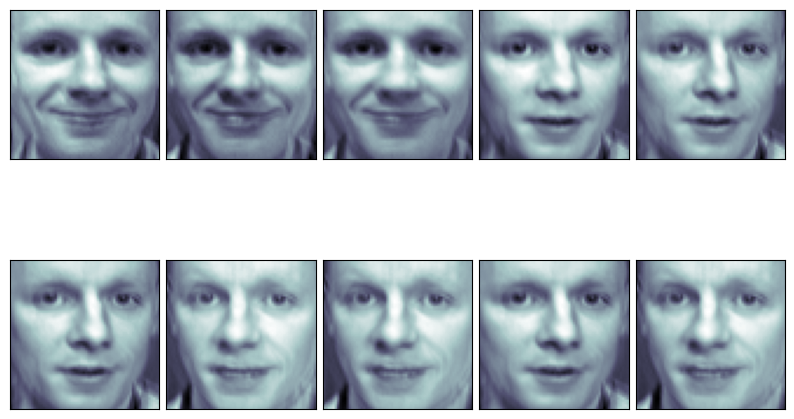

In [19]:
# 주성분 분석한 데이터로 출력한 이미지
N=2
M=5
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0,hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(X_inverse[n].reshape(64,64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.show()

그럼 각 주성분이 어떻게 나타나는지 확인해보자

In [24]:
face_mean = pca.mean_.reshape(64,64)
face_p1 = pca.components_[0].reshape(64,64)
face_p2 = pca.components_[1].reshape(64,64)


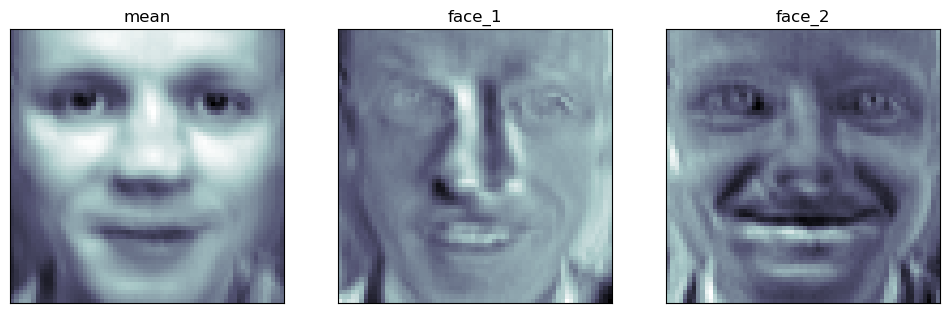

In [26]:
plt.figure(figsize=(12,7))
plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('mean')
plt.subplot(132)
plt.imshow(face_p1, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_1')
plt.subplot(133)
plt.imshow(face_p2, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_2')
plt.show()


10장의 사진은 이 3장으로 모두 표현할 수 있다.

그럼 mean 과 pc1으로 다양한 이미지를 그려보자

In [27]:
N=2
M=5
W = np.linspace(-5,10,N*M)

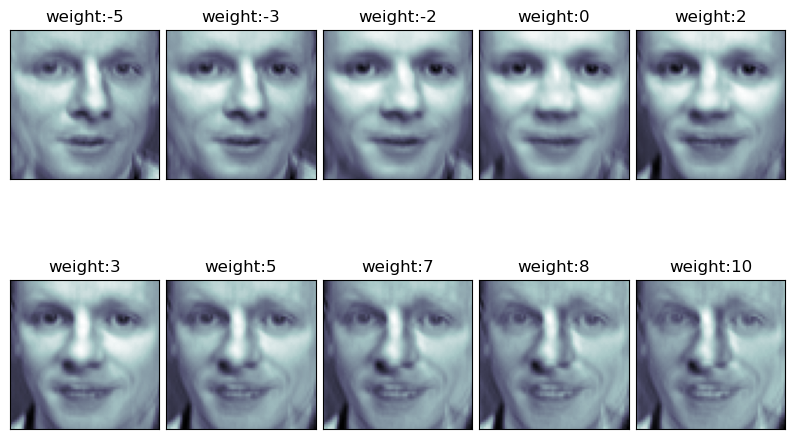

In [29]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0,hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean + W[n] * face_p1, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('weight:' + str(round(W[n])))

plt.show()

그럼 mean 과 pc2으로 다양한 이미지를 그려보자

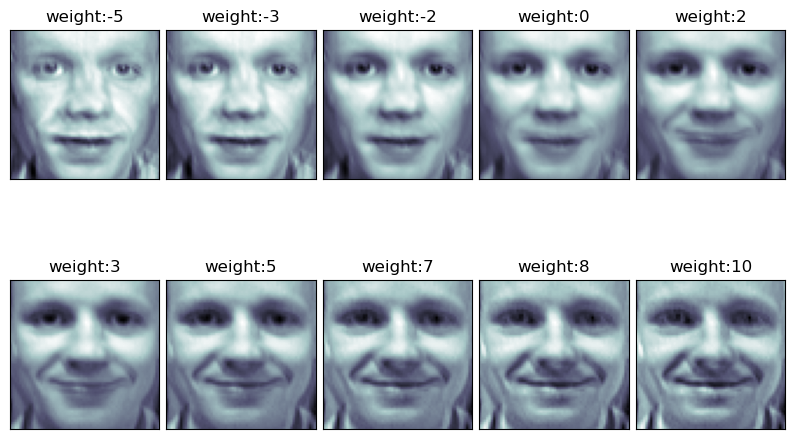

In [30]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0,hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean + W[n] * face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('weight:' + str(round(W[n])))

plt.show()

두개의 성분을 전부 이용해보자

In [31]:
nx, ny = (5,5)
x = np.linspace(-5,8,nx)
y = np.linspace(-5, 8 ,ny)

w1, w2 = np.meshgrid(x,y)


In [32]:
w1.shape

(5, 5)

In [33]:
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)

In [34]:
w1.shape

(25,)

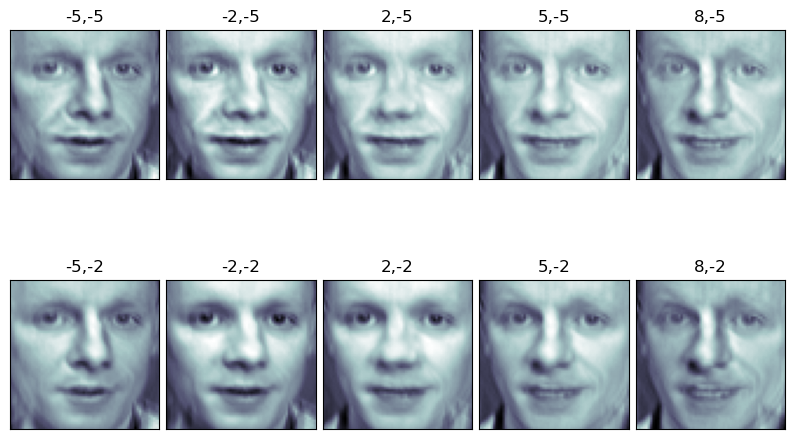

In [37]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0,hspace=0, wspace=0.05)

for n in range(N*M):
    ax = fig.add_subplot(N,M,n+1)
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n] * face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title(str(round(w1[n])) + ','+str(round(w2[n])))

plt.show()

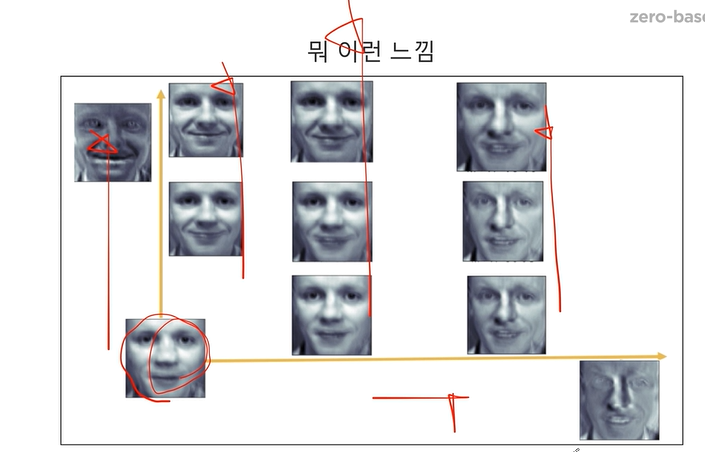